In [270]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 10.0)

$$ d \sin{\theta} = m \lambda $$

$$ \frac{d y}{D} = m \lambda $$


In [271]:
#get the raw data
import pandas as pd
data = pd.read_csv('./data/ex_inv_data.csv', skiprows = 3, dtype = 'float')
data

,d_b,d_t,d,delta_d,y,delta_y,n,D_h,D_v,delta_D_h
0,0.4974,0.4960,0.000497,7.000000e-07,182,1,29,5.16277,0.03,0.005
1,0.1954,0.1971,0.000196,8.500000e-07,162,2,11,5.16277,0.03,0.005
2,0.1015,0.0988,0.000100,1.350000e-06,193,3,7,5.16277,0.03,0.005
3,0.0509,0.0484,0.000050,1.250000e-06,129,5,3,5.16277,0.03,0.005
4,0.4974,0.4960,0.000497,7.000000e-07,200,1,35,4.66277,0.03,0.005
5,0.1954,0.1971,0.000196,8.500000e-07,176,2,13,4.66277,0.03,0.005
6,0.1015,0.0988,0.000100,1.350000e-06,175,4,7,4.66277,0.03,0.005
7,0.0509,0.0484,0.000050,1.250000e-06,116,5,3,4.66277,0.03,0.005
8,0.0234,0.0256,0.000024,1.100000e-06,122,17,2,4.66277,0.03,0.005
9,0.4974,0.4960,0.000497,7.000000e-07,210,2,35,4.91277,0.03,0.005


In [272]:
#clean the data up a bit

#Round the slit width to even multiples of 25 um
data["original_d"] = data.d
data.d = np.round(data.d / 25e-6) * 25e-6
data["D"] = np.sqrt(data.D_h **2 + data.D_v **2)

#convert y and delta_y to meters and divide it by n-1
data.y = data.y * 1e-3 / (data.n - 1)
data.delta_y = data.delta_y * 1e-3 / (data.n - 1)

data

,d_b,d_t,d,delta_d,y,delta_y,n,D_h,D_v,delta_D_h,original_d,D
0,0.4974,0.4960,0.000500,7.000000e-07,0.006500,0.000036,29,5.16277,0.03,0.005,0.000497,5.162857
1,0.1954,0.1971,0.000200,8.500000e-07,0.016200,0.000200,11,5.16277,0.03,0.005,0.000196,5.162857
2,0.1015,0.0988,0.000100,1.350000e-06,0.032167,0.000500,7,5.16277,0.03,0.005,0.000100,5.162857
3,0.0509,0.0484,0.000050,1.250000e-06,0.064500,0.002500,3,5.16277,0.03,0.005,0.000050,5.162857
4,0.4974,0.4960,0.000500,7.000000e-07,0.005882,0.000029,35,4.66277,0.03,0.005,0.000497,4.662867
5,0.1954,0.1971,0.000200,8.500000e-07,0.014667,0.000167,13,4.66277,0.03,0.005,0.000196,4.662867
6,0.1015,0.0988,0.000100,1.350000e-06,0.029167,0.000667,7,4.66277,0.03,0.005,0.000100,4.662867
7,0.0509,0.0484,0.000050,1.250000e-06,0.058000,0.002500,3,4.66277,0.03,0.005,0.000050,4.662867
8,0.0234,0.0256,0.000025,1.100000e-06,0.122000,0.017000,2,4.66277,0.03,0.005,0.000024,4.662867
9,0.4974,0.4960,0.000500,7.000000e-07,0.006176,0.000059,35,4.91277,0.03,0.005,0.000497,4.912862


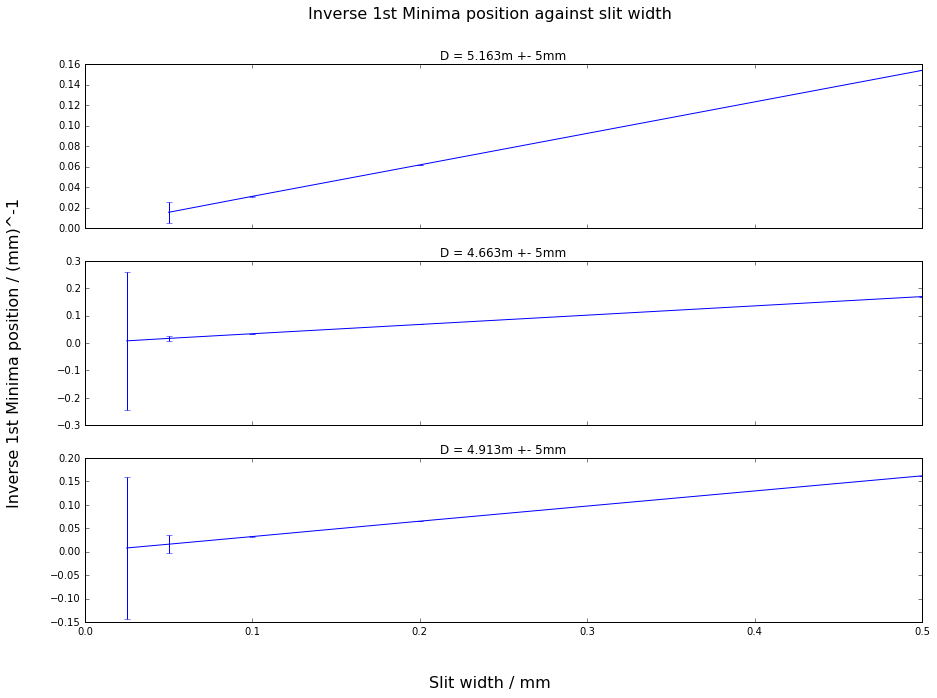

In [277]:
f, axes = plt.subplots(3, sharex='col')

# Set common labels
f.text(0.5, 0.04, 'Slit width / mm', ha='center', va='center', fontsize = 16)
f.text(0.06, 0.5, 'Inverse 1st Minima position / (mm)^-1', ha='center', va='center', rotation='vertical', fontsize = 16)

f.suptitle("Inverse 1st Minima position against slit width", fontsize=16)

for ex, ax in zip((data[0:4], data[4:9], data[9:]), axes):
    #ax.set_xlim([0, 5.0])
    ex_y = 1 / (ex.y * 1e3)
    ex_d_y = (ex.delta_y * 1e3  * ex.y**2 )
    ax.errorbar(1e3 * ex["d"], ex_y, yerr = ex_d_y.as_matrix())
    
    ax.set_title("D = {:.4}m +- 5mm".format(ex.iloc[ 0,  11]))
    

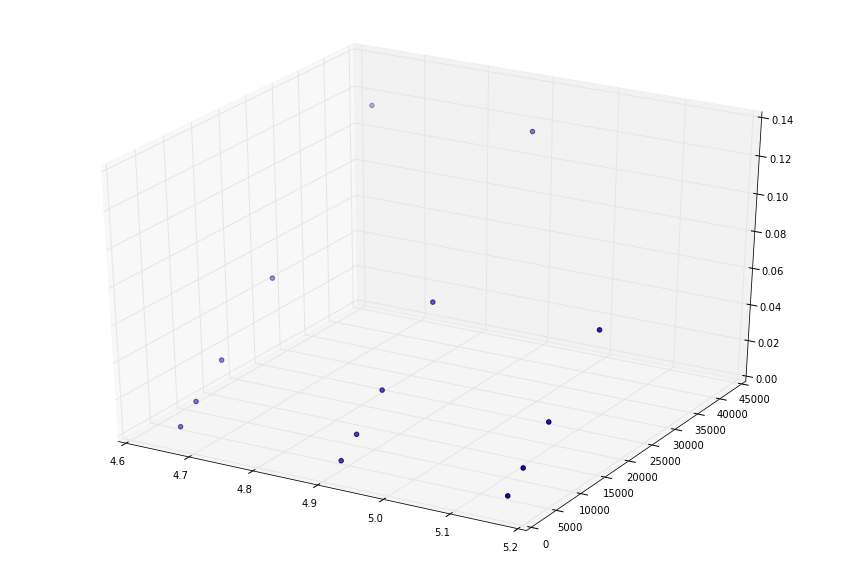

In [274]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = D, ys = 1 / d , zs = y)

We want to fit a function of the form:
$$ y = \lambda \frac{D}{d} $$

lambda = 6.289e-07 +- 2e-09


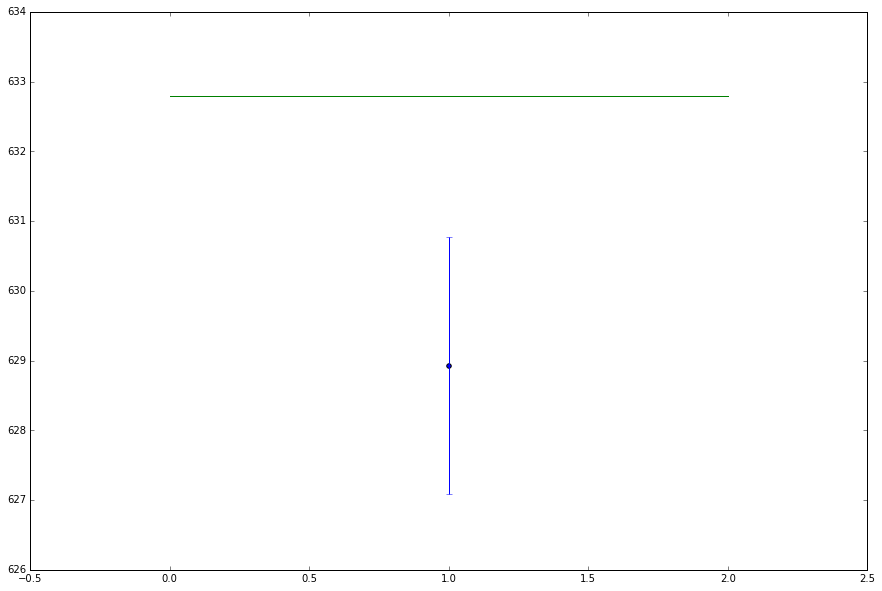

In [278]:
true_l = 632.8e-9
from scipy.optimize import curve_fit

def fn(x, l):
    D, d = x
    return l*D / d

def fit(D ,d ,y, delta_y, p0 = true_l):
    popt, pcov = curve_fit(fn, np.array([D, d]), y, p0 = p0, sigma = delta_y, absolute_sigma = True)
    l = popt
    sigma = np.sqrt(pcov[0])
    return l, sigma

l, sigma = fit(data.D, data.d, data.y, data.delta_y)
print("lambda = {:.4} +- {:.1}".format(l[0], sigma[0]))

plt.scatter((1), (l * 1e9))
plt.errorbar((1), (l * 1e9), yerr = (sigma * 1e9))
plt.plot((0, 2), (true_l * 1e9, true_l * 1e9))

In [300]:
#the above regression doesn't take into account the errors in D
#try adding gaussian noise N(mean = 0, sigma) to the D values and runnning the regression many times, to estimate
#the error in the regression due to error in D
def trial():
    noise = np.random.normal(loc = 0.0, scale = 0.005, size = len(data.D))
    D = data.D + noise
    l, sigma = fit(D, data.d, data.y, data.delta_y)
    return l
ls = np.array([trial() for i in range(1000)])
print(ls.mean(), "+-", ls.std())

6.28932244146e-07 +- 3.00253460298e-10
